<div style="text-align: center;">
  <h1>SALES PREDICTION USING PYTHON</h1>
  <h2>Aurobindo Parida</h2>
</div>

In [2]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#Read Data
df  = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.sample(5)

,TV,Radio,Newspaper,Sales
17,281.4,39.6,55.8,24.4
146,240.1,7.3,8.7,13.2
167,206.8,5.2,19.4,12.2
55,198.9,49.4,60.0,23.7
70,199.1,30.6,38.7,18.3


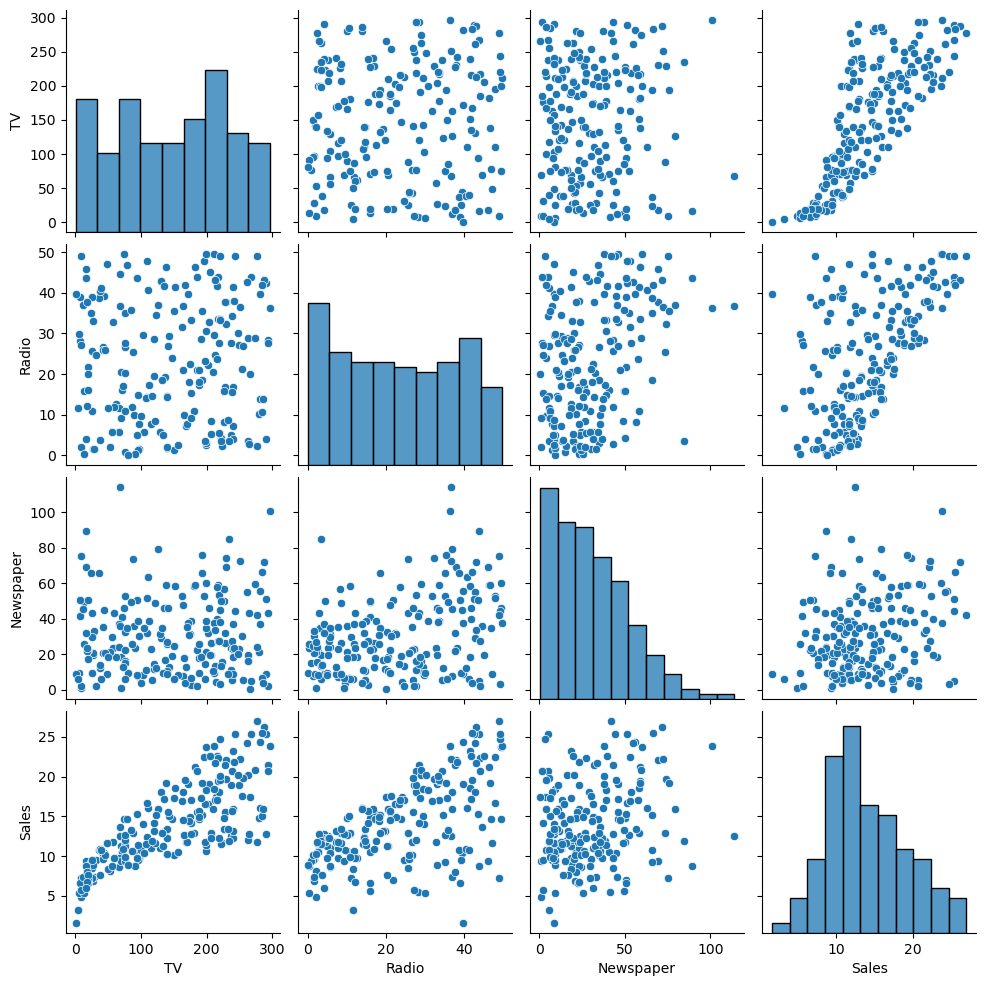

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

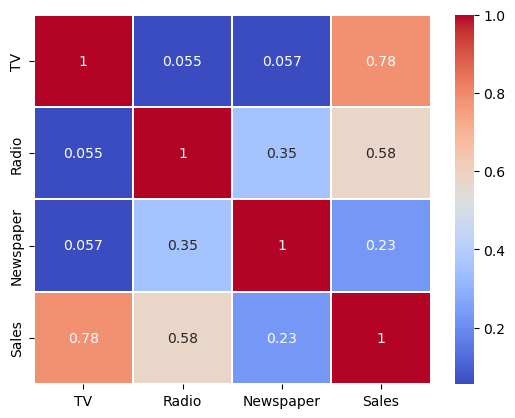

In [8]:
sns.heatmap(df.corr(),cmap='coolwarm',annot = True,linewidths=0.2)

<Axes: xlabel='Sales', ylabel='Newspaper'>

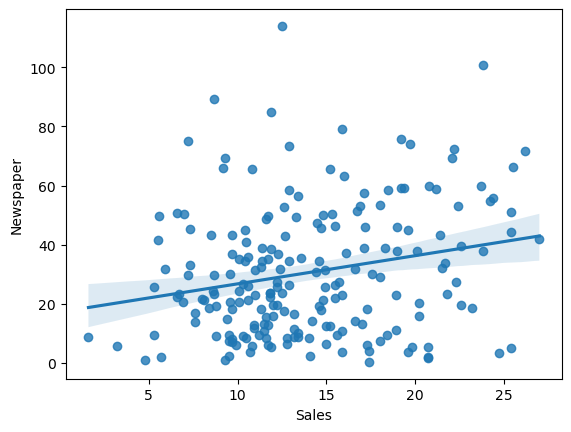

In [9]:
sns.regplot(x='Sales',y='Newspaper',data=df)

<Axes: xlabel='Sales', ylabel='TV'>

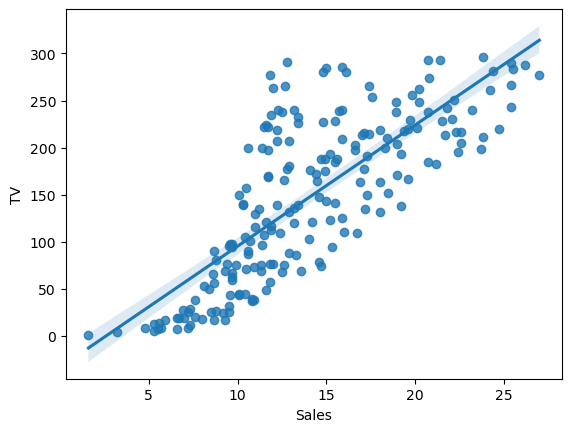

In [10]:
sns.regplot(x='Sales',y='TV',data=df)

<Axes: xlabel='Sales', ylabel='Radio'>

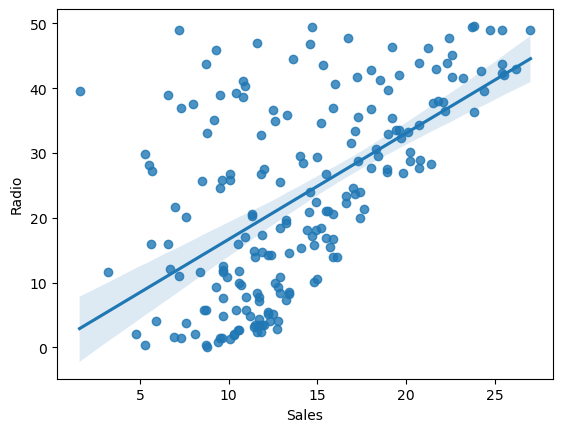

In [11]:
sns.regplot(x='Sales',y='Radio',data=df)

In [12]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,shuffle=True)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [16]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
print(f'''The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

The train accuracy : 0.899186456629991
The test accuracy : 0.8778246792939806


In [19]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
random_f_pred = random_forest.predict(x_test)

In [21]:
r2_score(y_test,random_f_pred)

0.9861676888055289